<a href="https://colab.research.google.com/github/tylerpiercy/content/blob/main/docs/unit1/If_GoalSeek/Unit_3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 3 Project**
---
### Instructions on how to use the code:
1. The game will start automatically when the play button is pressed
2. You and the python dealer will be dealt 2 cards, one of which for the dealer will be face-down
3. The game will give two button options: hit or stand
#####a. When you hit: Your player will take another card and add the value to your score total
#####b. When you stand: Your player will not take any new cards and will maintain the same score; the final scores will then be compared
4. When the game ends, you have the option to play again!
5. The game statistics will be input into a Google Sheet after the hand ends and the tally will be kept and displayed when you hit the game stats button
6. Have fun!!!
---
### [Google Stats Sheet](https://docs.google.com/spreadsheets/d/19yYBTxpbSrQksMMCghGF_yYnPv_2MwMYfbUOGNoRlhE/edit?usp=sharing)
---
### **Group Name:**
##### Team Chocolate Chocolate Chip
---
### **Members in the group:**
##### Tyler Piercy
##### Luke Gonzalez
##### Griffin Izu
---
### **How each team member contributed:**
#### Tyler completed:
* Markdown
* Game logic
* Dictionary/Lists
* Functions
* If-else/loop statement structures

#### Luke completed:
* Pandas
* Gspread/Spreadsheet
* Comments
* String variables

#### Griffin completed:
* iPyWidgets/GUI
* Functions
* Bar graph
* CSV file writing
* Pandas

###### *Special thanks to Marcos Espino for honorable debugging services*
---
### **Links to outside of class resources:**
##### [Importing Time Library](https://realpython.com/python-sleep/)
##### [Example Blackjack Game](https://www.geeksforgeeks.org/blackjack-console-game-using-python/)
##### [Hiding iPython Buttons](https://stackoverflow.com/questions/38964323/is-there-a-way-to-hide-a-displayed-object-using-ipython)
##### [Clearing Outputs iPython](https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code)




In [ ]:
# @title Imports and Google Sheets Connection
import random
import ipywidgets as widgets
import pandas as pd
import gspread
from time import sleep
from IPython.display import clear_output
import csv

from google.colab import auth
auth.authenticate_user()
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/19yYBTxpbSrQksMMCghGF_yYnPv_2MwMYfbUOGNoRlhE/edit?usp=sharing')
myWorksheet = wb.get_worksheet(0)


In [ ]:
# @title The Game
# test
# List of the deck suits and cards and the dictionary that defines the integer value of a card.

suits = ['Hearts', 'Spades', 'Clubs', 'Diamonds']
cards = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

card_values = {
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    'Jack':10,
    'Queen':10,
    'King':10
}

stats = {
    'Player Wins': 0,
    'Dealer Wins': 0,
}

# Sets the speed for the game so that outputs print individually rather than all at once

GAME_SPEED = 1.5

# Boolean used later in the code for when the dealer needs to reveal a card

dealer_revealed = False

# Play and play again button widgets

play_button = widgets.Button(
    description='Play',
    button_style='Success'
  )

display(play_button)

playagain_button = widgets.Button(
    description='Play Again',
    button_style='Success'
  )

# Function runs the entire game when play button is clicked

def play_click(b):

  # Disabling the display for the play and play again button until game end conditions are met

  play_button.layout.display = 'none'
  playagain_button.layout.display = 'none'

  # Function sends player and dealer hands and scores to google sheet

  def gspread():
    values = myWorksheet.get_all_values()
    next_row = len(values) + 1
    results = [print_cards(player_hand), get_total(player_hand), print_cards(dealer_hand), get_total(dealer_hand)]
    myWorksheet.insert_row(results, next_row)

  # Function converts player and dealer hands into strings to be printed

  def print_cards(hand):
    string = ''

    for card, suit in hand:
      string += f'{card} of {suit}, '
    return string[0:-2]

  # Function computes the integer value of the cards that the player and the dealer hold.

  def get_total(hand):
    ace_total = 0
    total = 0
    for card, suit in hand:
      if card == 'Ace':
        ace_total += 1
      else:
        total += card_values[card]
    for i in range(ace_total):
      if total < 11:
        total += 11
      else:
        total += 1
    return total

  # Function runs when the 'hit' button is clicked and computes whether the player busted or not.

  def hit_click(b):
    hit_button.disabled = True
    stand_button.disabled = True
    player_hand.append(deck.pop(0))
    print('\nYou hit!')
    print(f'Your cards are: {print_cards(player_hand)}')
    sleep(GAME_SPEED)
    if get_total(player_hand) > 21:
      print('You busted!')
      print(f'Your final score is: {get_total(player_hand)}')
      stats['Dealer Wins'] += 1
      gspread()
      playagain_button.layout.display = None
      display(playagain_button)
    elif get_total(player_hand) == 21:
      print(f'Your current score is: {get_total(player_hand)}')
      hit_button.disabled = True
      stand_button.disabled = False
    else:
      print(f'Your current score is: {get_total(player_hand)}')
      hit_button.disabled = False
      stand_button.disabled = False

  # Function runs when the 'stand' button is clicked and computes whether the player or the dealer won

  def stand_click(b):
    hit_button.disabled = True
    stand_button.disabled = True
    print(f'\nYou stand!\nYour current score is: {get_total(player_hand)}')
    sleep(GAME_SPEED)
    if not dealer_revealed:
      print(f"\nThe dealer flips his other card...")
      sleep(GAME_SPEED)
    print(f'The dealers hand is: {print_cards(dealer_hand)}')
    sleep(GAME_SPEED)
    print(f"The dealer's current score is: {get_total(dealer_hand)}\n")
    sleep(GAME_SPEED)

  # Makes sure that the dealer keeps drawing if their score is below 17, then prints the dealer's score when he either gets a blackjack or busts

    game_decided = False
    while get_total(dealer_hand) <= 16:
      drawn_card = deck.pop(0)
      dealer_hand.append(drawn_card)
      print('The dealer is drawing a card...')
      sleep(GAME_SPEED)
      print(f'The dealer has drawn a: {print_cards([drawn_card])}\n')
      sleep(GAME_SPEED)
      if get_total(dealer_hand) == 21:
        game_decided = True
        print(f'Blackjack! The house wins! Your final score was: {get_total(player_hand)}')
        print(f"The dealer's final score was: {get_total(dealer_hand)}")
        stats['Dealer Wins'] += 1
        gspread()
        playagain_button.layout.display = None
        display(playagain_button)
      elif get_total(dealer_hand) > 21:
        stats['Player Wins'] += 1
        gspread()
        print('The house busts! You win!')
        break
      elif get_total(dealer_hand) > 21 and get_total(player_hand) == 21:
        stats['Player Wins'] += 1
        gspread()
        print('Blackjack! You win!')
        break

    if get_total(dealer_hand) >= 17 and not game_decided:
      if get_total(player_hand) > get_total(dealer_hand):
        if get_total(player_hand) == 21:
          print('Blackjack! You win!')
          stats['Player Wins'] += 1
          gspread()
        else:
          print(f'You win!')
          stats['Player Wins'] += 1
          gspread()
      elif get_total(player_hand) <= get_total(dealer_hand) and get_total(dealer_hand) <= 21:
        print('The house wins!')
        stats['Dealer Wins'] += 1
        gspread()
        sleep(GAME_SPEED)
      print(f'Your final score is: {get_total(player_hand)}')
      print(f"The dealer's final score is: {get_total(dealer_hand)}")
      playagain_button.layout.display = None
      display(playagain_button)

  ##########################################################

  # Hit and stand button widgets

  hit_button = widgets.Button(
    description='Hit',
    button_style='Success'
  )
  stand_button = widgets.Button(
    description='Stand',
    button_style='Success'
  )

  display(widgets.HBox((hit_button, stand_button)))

  # Adds all 52 cards into the deck and shuffles it

  deck = []
  for suit in suits:
    for card in cards:
      deck.append((card, suit))

  random.shuffle(deck)

  # Beginning of the game: adds two cards to the hand of the player and the dealer

  player_hand = []
  dealer_hand = []

  player_hand.append(deck.pop(0))
  dealer_hand.append(deck.pop(0))
  player_hand.append(deck.pop(0))
  dealer_hand.append(deck.pop(0))

  dealer_revealed = False

  # Prints the player's hand and the dealer's first card

  print(f'\nYour cards are: {print_cards(player_hand)}')
  sleep(GAME_SPEED)
  print(f'Your current score is: {get_total(player_hand)}')
  sleep(GAME_SPEED)
  print(f"\nThe dealer's cards are: {print_cards([dealer_hand[0]])} and one face-down card")
  sleep(GAME_SPEED)

  # Condition that prevents player from hitting when immediately drawing a blackjack.

  if get_total(player_hand) == 21:
      hit_button.disabled = True
      stand_button.disabled = False

  # Conditions in which the dealer's second card is revealed.

  if dealer_hand[0][0] in ['Ace', '10', 'Jack', 'Queen', 'King']:
    dealer_revealed = True
    print('Flipping face down card...')
    sleep(GAME_SPEED)
    print(f'The face down card is: {print_cards([dealer_hand[1]])}')
    sleep(GAME_SPEED)
    print(f"The dealer's score is: {get_total(dealer_hand)}")
    if get_total(dealer_hand) == 21:
      print(f'Blackjack! The house wins! Your final score was: {get_total(player_hand)}')
      stats['Dealer Wins'] += 1
      gspread()
      display(playagain_button)
      playagain_button.layout.display = None

  # Makes hit and stand buttons function when clicked

  hit_button.on_click(hit_click)
  stand_button.on_click(stand_click)

# Play again button function that clears output and runs previous code again

def playagain_click(b):
  clear_output()
  playagain_button.on_click(play_click)

# Makes play and play again buttons function when clicked

play_button.on_click(play_click)
playagain_button.on_click(playagain_click)


Button(button_style='success', description='Play', style=ButtonStyle())


Your cards are: 7 of Hearts, 9 of Clubs
Your current score is: 16

The dealer's cards are: Jack of Spades and one face-down card
Flipping face down card...
The face down card is: 2 of Spades
The dealer's score is: 12

You hit!
Your cards are: 7 of Hearts, 9 of Clubs, 4 of Diamonds
Your current score is: 20

You stand!
Your current score is: 20
The dealers hand is: Jack of Spades, 2 of Spades
The dealer's current score is: 12

The dealer is drawing a card...
The dealer has drawn a: 7 of Clubs

You win!
Your final score is: 20
The dealer's final score is: 19


Button(button_style='success', description='Play Again', style=ButtonStyle())

Button(button_style='success', description='Get Stats', style=ButtonStyle())

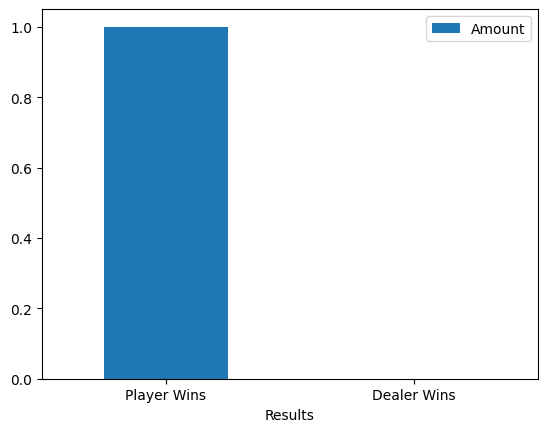

In [ ]:
# @title Player Stats

# Button to get player stats

stats_button = widgets.Button(
    description='Get Stats',
    button_style='Success'
  )

display(stats_button)

columns = ['Player Wins', 'Dealer Wins']
row = [[stats['Player Wins'], stats['Dealer Wins']]]
csv_name = 'game_results.csv'

# Writes the new CSV file
with open(csv_name, 'w') as datafile:
    csvwriter = csv.writer(datafile)
    csvwriter.writerow(columns)
    csvwriter.writerows(row)

# Opens the newly written CSV file
game_data = open('/content/game_results.csv')

# Pulls data from CSV file into dataframe
df = pd.read_csv(game_data)

def stats_click(b):
  clear_output()
  display(stats_button)
  results_df = pd.DataFrame({'Results':['Player Wins','Dealer Wins'], 'Amount':[stats['Player Wins'],stats['Dealer Wins']]})
  ax = results_df.plot.bar(x='Results', y='Amount', rot=0)

stats_button.on_click(stats_click)
